# First steps in PAOFLOW

F.T. Cerasoli, A.R. Supka, A. Jayaraj, I. Siloi, M. Costa, J. Slawinska, S. Curtarolo, M. Fornari, D. Ceresoli, and M. Buongiorno Nardelli, Advanced modeling of materials with PAOFLOW 2.0: New features and software design, Comp. Mat. Sci. 200, 110828 (2021).

M. Buongiorno Nardelli, F. T. Cerasoli, M. Costa, S Curtarolo,R. De Gennaro, M. Fornari, L. Liyanage, A. Supka and H. Wang, PAOFLOW: A utility to construct and operate on ab initio Hamiltonians from the Projections of electronic wavefunctions on Atomic Orbital bases, including characterization of topological materials, Comp. Mat. Sci. vol. 143, 462 (2018).

In [1]:
import warnings
warnings.filterwarnings("ignore") 

import os
import os.path
import logging

import numpy as np
import matplotlib
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

from PAOFLOW import PAOFLOW

# Example 1

## Read QE data and check the bands

In [2]:
paoflow = PAOFLOW.PAOFLOW(savedir='Example1/silicon.save', model=None, outputdir='Example1/output', 
                          smearing='gauss',verbose=True)
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2018 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 72
Number of electrons: 8
Number of bands: 18
SciPy will perform FFTs
Serial execution
Estima

In [3]:
paoflow.projections()

atom: Si  pseudo: Si.pw-mt_fhi_spd.UPF            tau: [0. 0. 0.]
      atwfc:   1  3s  l=0, m=1
      atwfc:   2  3p  l=1, m=1
      atwfc:   3  3p  l=1, m=2
      atwfc:   4  3p  l=1, m=3
      atwfc:   5  3d  l=2, m=1
      atwfc:   6  3d  l=2, m=2
      atwfc:   7  3d  l=2, m=3
      atwfc:   8  3d  l=2, m=4
      atwfc:   9  3d  l=2, m=5
atom: Si  pseudo: Si.pw-mt_fhi_spd.UPF            tau: [2.6498695 2.6498695 2.6498695]
      atwfc:  10  3s  l=0, m=1
      atwfc:  11  3p  l=1, m=1
      atwfc:  12  3p  l=1, m=2
      atwfc:  13  3p  l=1, m=3
      atwfc:  14  3d  l=2, m=1
      atwfc:  15  3d  l=2, m=2
      atwfc:  16  3d  l=2, m=3
      atwfc:  17  3d  l=2, m=4
      atwfc:  18  3d  l=2, m=5
Projections in:                           122.597 sec


In [4]:
# build the paoflow bands
paoflow.projectability()

Projectability vector  [0.99644702 0.99740946 0.99742743 0.99857175 0.99713386 0.99412652
 0.99163534 0.97229427 0.94056155 0.9256154  0.67970333 0.75002863
 0.72792494 0.70661887 0.52800866 0.55660447 0.56311016 0.52843941]
# of bands with good projectability > 0.95 = 8
Range of suggested shift  6.160564007074756  ,  10.63868387232522
Projectability in:                         18.478 sec


In [5]:
paoflow.pao_hamiltonian()

Building Hks in:                          161.279 sec
k -> R in:                                  0.057 sec


In [6]:
paoflow.bands(ibrav=2, nk=500)

Bands in:                                   8.305 sec


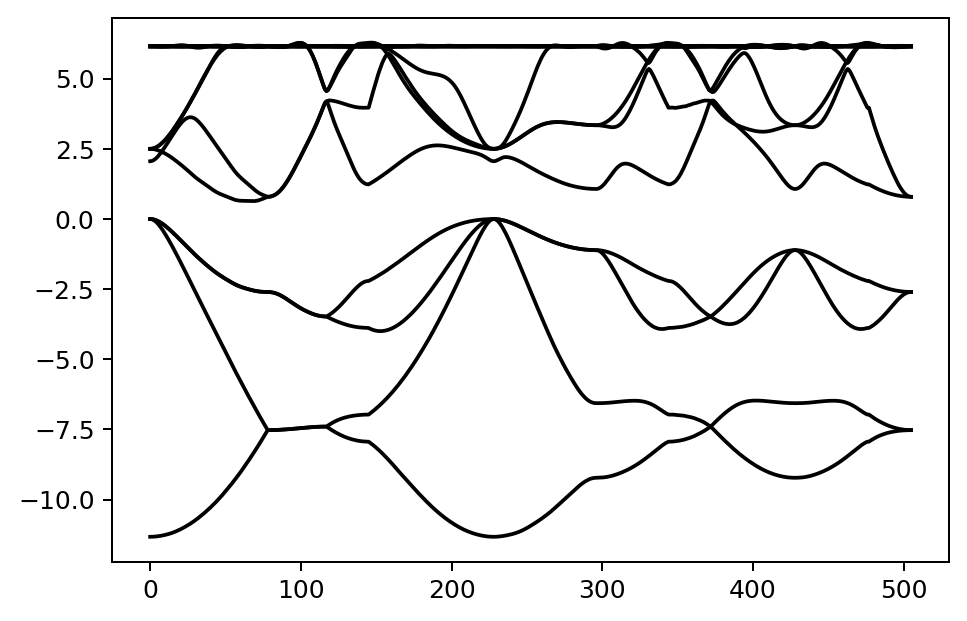

In [7]:
fig = plt.figure(dpi=180)
# plot the paoflow bands
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
# plt.ylim(0.6,2)
plt.show()   

In [8]:
paoflow.interpolated_hamiltonian(nfft1=16,nfft2=16,nfft3=16)
paoflow.pao_eigh()

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 16
2 : 12 -> 16
3 : 12 -> 16
New estimated maximum array size: 0.25 GBytes
R -> k with Zero Padding in:              766.749 sec
Eigenvalues in:                             0.737 sec


In [9]:
# paoflow momentum operators
paoflow.gradient_and_momenta()

Gradient in:                               81.822 sec
Momenta in:                                 0.459 sec


In [10]:
# adaptive smearing
paoflow.adaptive_smearing()

Adaptive Smearing in:                       1.662 sec


In [11]:
# paoflow dos
paoflow.dos(emin=-10, emax=6, ne=999)

Writing Adaptive DoS Files
DoS (Adaptive Smearing) in:                11.509 sec


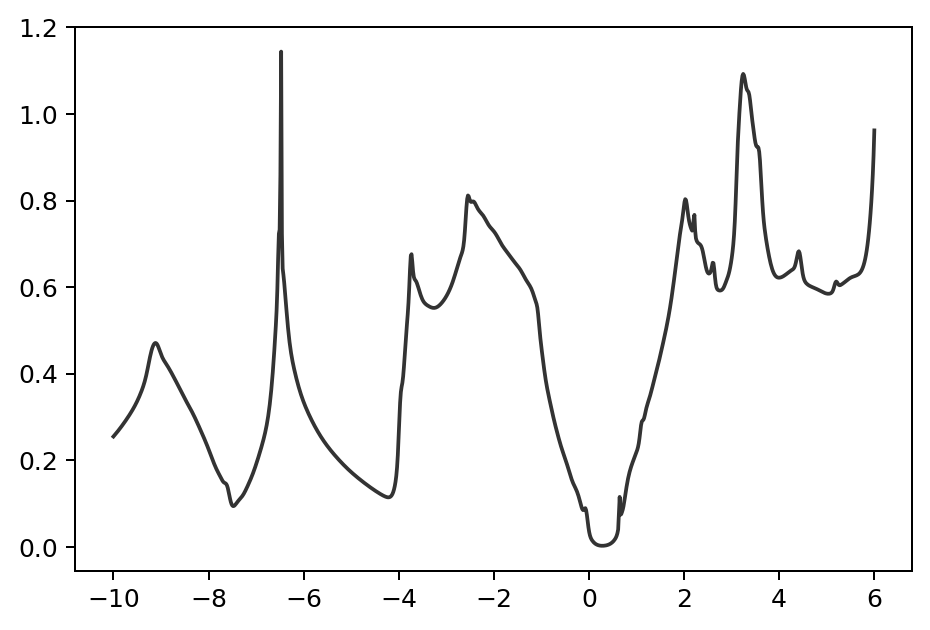

In [12]:
fig = plt.figure(dpi=180)
dosdk = np.loadtxt('Example1/output/dosdk_0.dat')
plt.plot(dosdk[:,0],dosdk[:,1],alpha=0.8,color='black')
plt.show()

## Calculate Onsager coefficients with PAOFLOW

In [13]:
# calculate Onsager coefficients with PAOFLOW
paoflow.transport(tmin=300,tmax=300,emin=-12, emax=6, ne=1000)
# for better converged results run paoflow with nfft*=32 and read data from output/

Transport in:                            1666.584 sec


In [14]:
sigma_pao = np.loadtxt('Example1/output/sigma_0.dat')
sigma_paodk = np.loadtxt('Example1/output/sigmadk_0.dat')
seebeck_pao = np.loadtxt('Example1/output/Seebeck_0.dat')
kappa_pao = np.loadtxt('Example1/output/kappa_0.dat')

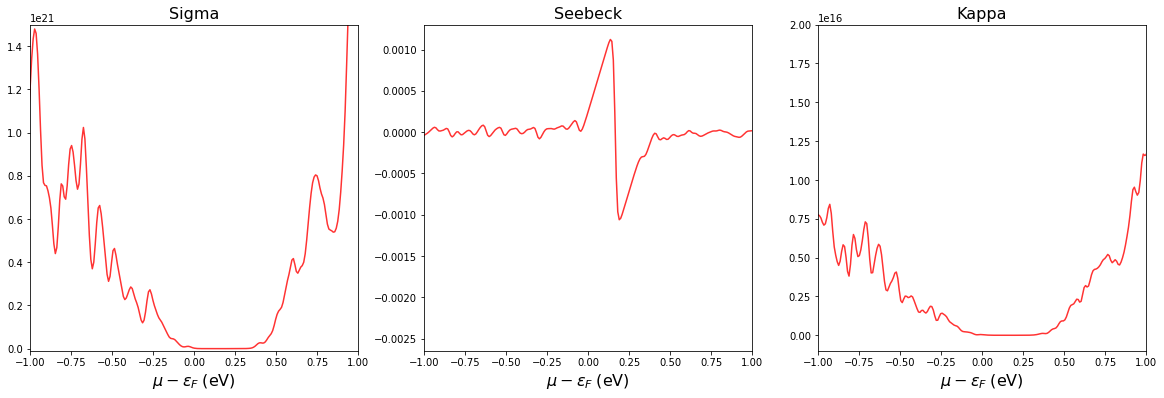

In [15]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
ax[0].set_title('Sigma',fontsize=16)
ax[0].set_xlabel(r"$\mu - \varepsilon_F\;\left(\mathrm{eV}\right)$",fontsize=16)
ax[0].set_xlim(-1,1)
# ax[0].set_xlim(0.3,0.36)
ax[0].set_ylim(-0.01e21,1.5e21)
ax[0].plot(sigma_pao[:,1]/2,sigma_pao[:,2],color='red',alpha=0.8)
# ax[0].plot(sigma_paodk[:,1]/2,sigma_paodk[:,2],color='green',alpha=0.5)
ax[1].set_title('Seebeck',fontsize=16)
ax[1].set_xlabel(r"$\mu - \varepsilon_F\;\left(\mathrm{eV}\right)$",fontsize=16)
ax[1].set_xlim(-1,1)
# ax[1].set_ylim(-0.005,0.005)
ax[1].plot(seebeck_pao[:,1]/2,seebeck_pao[:,2],color='red',alpha=0.8)
ax[2].set_title('Kappa',fontsize=16)
ax[2].set_xlabel(r"$\mu - \varepsilon_F\;\left(\mathrm{eV}\right)$",fontsize=16)
ax[2].set_xlim(-1,1)
ax[2].set_ylim(-0.1e16,2e16)
ax[2].plot(kappa_pao[:,1]/2,kappa_pao[:,2],color='red',alpha=0.8)
plt.show()

In [16]:
paoflow.finish_execution()

Total CPU time =                         3213.661 sec
Memory usage on rank 0:  531.9180 GB
Maximum concurrent memory usage:  531.9180 GB


## PAOFLOW internal bases

In [17]:
paoflow = PAOFLOW.PAOFLOW(savedir='Example1/silicon.save', model=None, outputdir='Example1/output', 
                          smearing='gauss',verbose=True)
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2018 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 72
Number of electrons: 8
Number of bands: 18
SciPy will perform FFTs
Serial execution
Estima

In [18]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Si':['3S','3P','3D','4S','4P','4F']}
paoflow.projections(internal=True)

atom: Si  AEWFC: ./BASIS/Si/3S.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si/3P.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si/3D.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si/4S.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si/4P.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si/4F.dat               tau: [0. 0. 0.]
      atwfc:   1  3S  l=0, m=1
      atwfc:   2  3P  l=1, m=1
      atwfc:   3  3P  l=1, m=2
      atwfc:   4  3P  l=1, m=3
      atwfc:   5  3D  l=2, m=1
      atwfc:   6  3D  l=2, m=2
      atwfc:   7  3D  l=2, m=3
      atwfc:   8  3D  l=2, m=4
      atwfc:   9  3D  l=2, m=5
      atwfc:  10  4S  l=0, m=1
      atwfc:  11  4P  l=1, m=1
      atwfc:  12  4P  l=1, m=2
      atwfc:  13  4P  l=1, m=3
      atwfc:  14  4F  l=3, m=1
      atwfc:  15  4F  l=3, m=2
      atwfc:  16  4F  l=3, m=3
      atwfc:  17  4F  l=3, m=4
      atwfc:  18  4F  l=3, m=5
      atwfc:  19  4F  l=3, m=6
      atwfc:  20  4F 

In [19]:
# build the paoflow bands
paoflow.projectability()

Projectability vector  [0.99589592 0.98839504 0.98305346 0.9833349  0.99293563 0.99136721
 0.99092298 0.98841134 0.98791078 0.98881065 0.98303054 0.98181846
 0.97702644 0.97766492 0.97103376 0.96077359 0.9578303  0.945225  ]
# of bands with good projectability > 0.95 = 17
Range of suggested shift  17.275180576564168  ,  21.755130864892593
Projectability in:                          4.446 sec


In [20]:
paoflow.pao_hamiltonian()

Building Hks in:                           18.686 sec
k -> R in:                                  0.165 sec


In [21]:
paoflow.bands(ibrav=2, nk=500)

Bands in:                                   1.300 sec


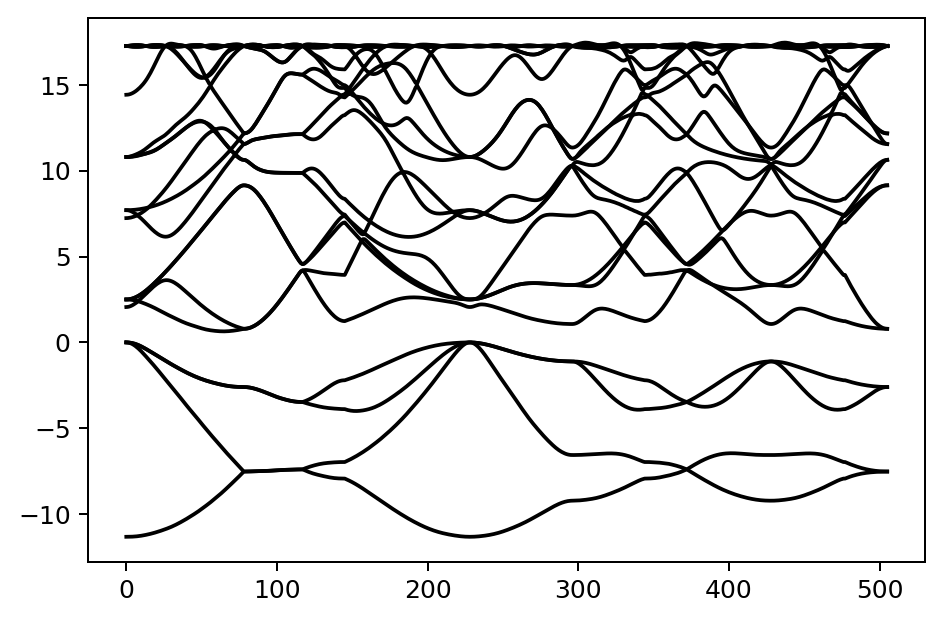

In [22]:
fig = plt.figure(dpi=180)
# plot the paoflow bands
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
# plt.ylim(0.6,2)
plt.show()   

In [23]:
paoflow.finish_execution()

Total CPU time =                          121.741 sec
Memory usage on rank 0:  531.9180 GB
Maximum concurrent memory usage:  531.9180 GB


# Example 2

In [24]:
paoflow = PAOFLOW.PAOFLOW(savedir='Example2/pt.save', model=None, outputdir='Example2/output', 
                          smearing='gauss', verbose=True)
data_controller = paoflow.data_controller
arry, attr = data_controller.data_dicts()
# Internal basis
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Pt':['5D','6S','6P','7S','7P']}


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2018 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 72
Number of electrons: 10
Number of bands: 20
SciPy will perform FFTs
Serial execution
Estim

In [26]:
paoflow.projections(internal=True)

atom: Pt  AEWFC: ./BASIS/Pt/5D.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt/6S.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt/6P.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt/7S.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt/7P.dat               tau: [0. 0. 0.]
      atwfc:   1  5D  l=2, m=1
      atwfc:   2  5D  l=2, m=2
      atwfc:   3  5D  l=2, m=3
      atwfc:   4  5D  l=2, m=4
      atwfc:   5  5D  l=2, m=5
      atwfc:   6  5D  l=2, m=1
      atwfc:   7  5D  l=2, m=2
      atwfc:   8  5D  l=2, m=3
      atwfc:   9  5D  l=2, m=4
      atwfc:  10  5D  l=2, m=5
      atwfc:  11  6S  l=0, m=1
      atwfc:  12  6S  l=0, m=1
      atwfc:  13  6P  l=1, m=1
      atwfc:  14  6P  l=1, m=2
      atwfc:  15  6P  l=1, m=3
      atwfc:  16  6P  l=1, m=1
      atwfc:  17  6P  l=1, m=2
      atwfc:  18  6P  l=1, m=3
      atwfc:  19  7S  l=0, m=1
      atwfc:  20  7S  l=0, m=1
      atwfc:  21  7P  l=1, m=1
      atwfc:  22  7P  l=

In [27]:
paoflow.projectability()
paoflow.pao_hamiltonian()

Projectability vector  [0.99109734 0.99109734 0.98259004 0.98259004 0.98536145 0.98536145
 0.98363497 0.98363497 0.98466283 0.98466283 0.98375214 0.98375214
 0.87582289 0.87582289 0.70091964 0.70091964 0.73120881 0.73120882
 0.48847347 0.48847347]
# of bands with good projectability > 0.95 = 12
Range of suggested shift  5.586984369048057  ,  18.171079498363
Projectability in:                          1.210 sec
Building Hks in:                            0.812 sec
k -> R in:                                  0.070 sec


In [28]:
paoflow.bands(ibrav=2, nk=2000)

Bands in:                                  12.605 sec


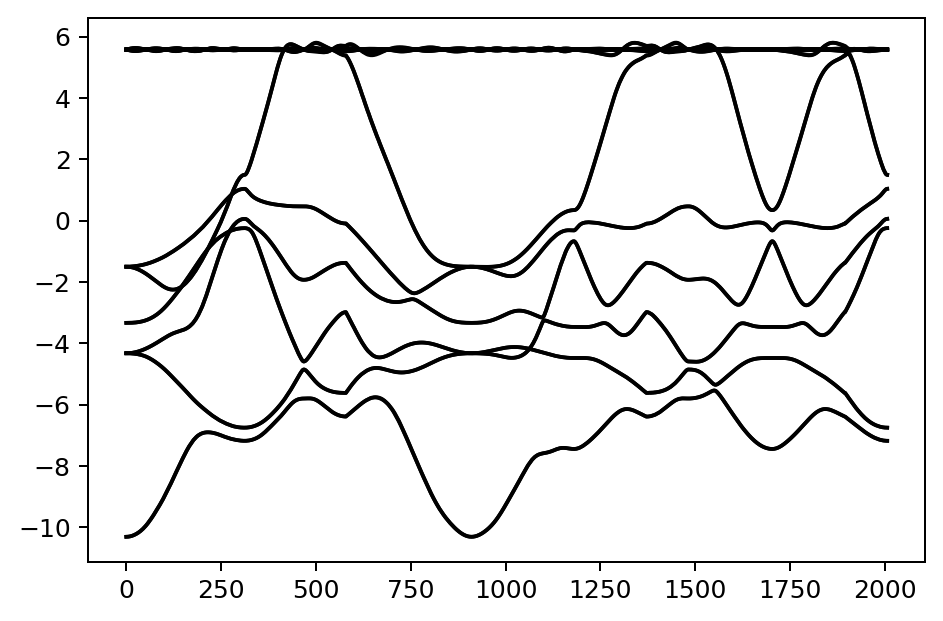

In [29]:
# plot the paoflow bands
fig = plt.figure(dpi=180)
eband0 = arry['E_k'][:,:,0]
for ib in range(eband0.shape[1]):
    plt.plot(eband0[:,ib],color='black')

In [30]:
paoflow.interpolated_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
paoflow.adaptive_smearing()

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 24
2 : 12 -> 24
3 : 12 -> 24
New estimated maximum array size: 1.79 GBytes
R -> k with Zero Padding in:               61.126 sec
Eigenvalues in:                            10.862 sec
Gradient in:                                3.917 sec
Momenta in:                                18.330 sec
Adaptive Smearing in:                       1.118 sec


In [31]:
paoflow.spin_Hall(emin=-8., emax=4., s_tensor=[[0,1,2]])

Writing bxsf files for Spin Berry Curvature
Spin Hall Conductivity in:                 69.073 sec


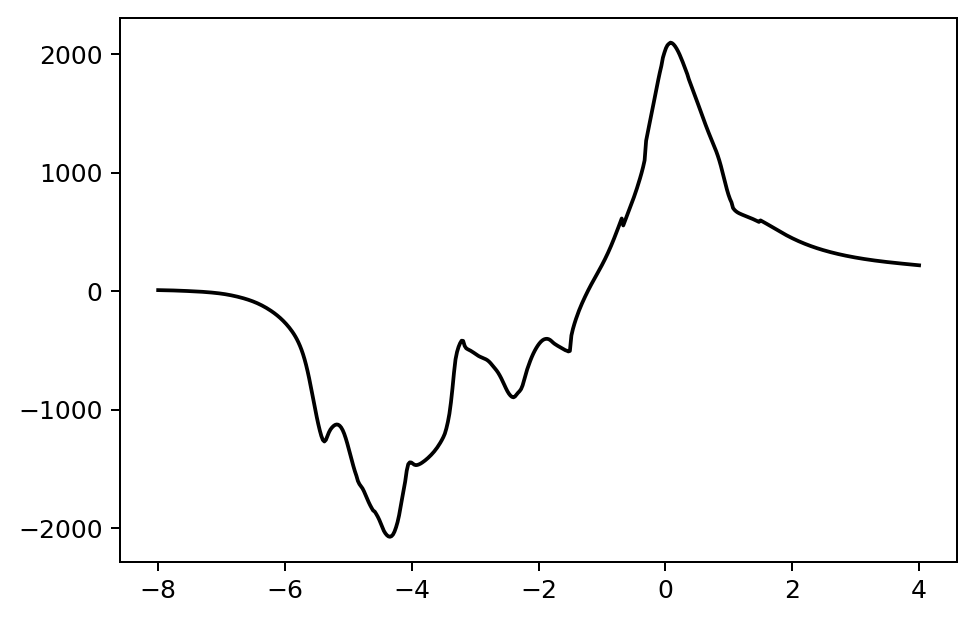

In [35]:
shc = np.loadtxt('Example2/output/shcEf_z_xy.dat')
# plot the paoflow bands
fig = plt.figure(dpi=180)
plt.plot(shc[:,0],shc[:,1],color='black')

In [19]:
paoflow.finish_execution()

Total CPU time =                          499.526 sec
Memory usage on rank 0:  1120.1992 GB
Maximum concurrent memory usage:  1120.1992 GB
